<h2> <font color='blue'> Day 2 afternoon Challenge

<h3><font color=blue> The goal today is to compare seasonal timeseries of the lidar 18m wind data. A suggestion of steps are shown below, but this code can be written many different ways (and much more effieiciently than suggested below) If you have an idea of how to procede, ignore the comments! The comments should be used if you have no idea where to get started.<br/><br/>Ultimately the end goal is to have: 
    <br/> 1. a plot or plots that compares seasonal data from each month in 2020. The timesteps should be daily averaged windspeed.
    <font color='red'><br/> 2. accomplished using only one big loop (can have nested loops inside)
    <br/> <font color='blue'>3. a written description comparing the seasonal wind trends
    <br/> <font color='red'>4. The same comparison as 1 but this time using both 2019 and 2020 dates to calculate the daily averaged windspeed.
    

<h1><font color='blue'> 1. 

In [ ]:
#load in libraries you might need here
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
from numpy import savetxt
import xarray as xr
import os
import scipy
import pandas as pd
import matplotlib.colors
from matplotlib import cm
import netCDF4
from netCDF4 import Dataset




In [ ]:
#load in the exact same wind_array data we used in the morning session

#Uploading data-don't need to worry about how to write any of this code yet!
lidar_winds=pd.read_csv('lidar_winds_short.csv')
time=np.asarray(lidar_winds['timestamp'])
wind18m=np.asarray(lidar_winds['wspd18m'])
wind_array=np.array([time,wind18m])


<h3> Create Array for Spring 2020 Daily Data

In [ ]:
#Using 'for' loops, create numpy arrays for each season
##Seasons here can be considered 
##Summer:June,July,Aug; Fall:Sept,Oct,Nov; Winter:Dec,Jan,Feb; Spring:March,Apr,May

#Save the number of rows in wind_array as a variable Num_dates
Num_dates=len(wind_array[0])

#Initialize an empty numpy array
wind_spring_2020=np.array([0,0])

#for a range of values from zero to the number of values in the wind_array
for i in range(len(wind_array[0])):
    #record the time and windspeed at each step
    time=wind_array[0,i]
    wdsp=wind_array[1,i]
    
    #From the time, record the year and month at each step
    year=time[6:10]
    month=time[0:2]
    
    #If the year is 2020 and if the month is in the season
    if(year=='2020'):
        if (month=='03' or month=='04' or month=='05'):
            #Make a 2 entry array with that time and windspeed
            newdata=[time,wdsp]
            #Add that time,windspeed entry to the initalized numpy array
            wind_spring_2020=np.vstack((wind_spring_2020,newdata))

#After all the entries from June 2020 have been added, delete the initial [0,0] entry        
wind_spring_2020=np.delete(wind_spring_2020,0,0)
        

#Initialize a new 2d numpy array with one row of [0,0]
daily_wind_spring_2020=np.array([0,0])

    
#For a range of zero to number of hourly timesteps in june 2020 (number of 10 minutely timesteps/6)
for j in range(int(len(wind_spring_2020[:,0])/144)-1):
    #label k as j*6, so k counts through all of the june 2020 timesteps by hour
    k=j*144
    #Make a new variable day_hour that just records the day and hour for each k element of wind_06_2020
    day=wind_spring_2020[k,0][3:5]
    
    #hourly windspeed is calculated from the the k, k+1, k+2,...,k+5 timesteps of the 10 minute data. So each of the 10 minute data
    #is averaged hourly
    sum=0
    for i in np.arange(k,k+145):
        sum=sum+float(wind_spring_2020[i,1])
    
        
    daily_wdsp=sum/144
    
    #New data takes the day_hour and hourly windspeed variables in a 2 column row
    newdailydata=[day,daily_wdsp]
    
    #Add this new data to the initialized hourly windspeed array
    daily_wind_spring_2020=np.vstack((daily_wind_spring_2020,newdailydata))
#After all data has been added, delete the initial [0,0] row
daily_wind_spring_2020=np.delete(daily_wind_spring_2020,0,0)    
    



<h3> Create Array for Summer 2020 Daily Data

In [ ]:
#Using 'for' loops, create numpy arrays for each season
##Seasons here can be considered 
##Summer:June,July,Aug; Fall:Sept,Oct,Nov; Winter:Dec,Jan,Feb; Spring:March,Apr,May

#Save the number of rows in wind_array as a variable Num_dates
Num_dates=len(wind_array[0])

#Initialize an empty numpy array
wind_summer_2020=np.array([0,0])

#for a range of values from zero to the number of values in the wind_array
for i in range(len(wind_array[0])):
    #record the time and windspeed at each step
    time=wind_array[0,i]
    wdsp=wind_array[1,i]
    
    #From the time, record the year and month at each step
    year=time[6:10]
    month=time[0:2]
    
    #If the year is 2020 and if the month is in the season
    if(year=='2020'):
        if (month=='06' or month=='07' or month=='08'):
            #Make a 2 entry array with that time and windspeed
            newdata=[time,wdsp]
            #Add that time,windspeed entry to the initalized numpy array
            wind_summer_2020=np.vstack((wind_summer_2020,newdata))

#After all the entries from June 2020 have been added, delete the initial [0,0] entry        
wind_summer_2020=np.delete(wind_summer_2020,0,0)
        

#Initialize a new 2d numpy array with one row of [0,0]
daily_wind_summer_2020=np.array([0,0])

    
#For a range of zero to number of hourly timesteps in june 2020 (number of 10 minutely timesteps/6)
for j in range(int(len(wind_summer_2020[:,0])/144)-1):
    #label k as j*6, so k counts through all of the june 2020 timesteps by hour
    k=j*144
    #Make a new variable day_hour that just records the day and hour for each k element of wind_06_2020
    day=wind_summer_2020[k,0][3:5]
    
    #hourly windspeed is calculated from the the k, k+1, k+2,...,k+5 timesteps of the 10 minute data. So each of the 10 minute data
    #is averaged hourly
    sum=0
    for i in np.arange(k,k+145):
        sum=sum+float(wind_summer_2020[i,1])
    
        
    daily_wdsp=sum/144
    
    #New data takes the day_hour and hourly windspeed variables in a 2 column row
    newdailydata=[day,daily_wdsp]
    
    #Add this new data to the initialized hourly windspeed array
    daily_wind_summer_2020=np.vstack((daily_wind_summer_2020,newdailydata))
#After all data has been added, delete the initial [0,0] row
daily_wind_summer_2020=np.delete(daily_wind_summer_2020,0,0)    
    


<h3> Create Array for Fall 2020 Daily Data

In [ ]:
#Using 'for' loops, create numpy arrays for each season
##Seasons here can be considered 
##Summer:June,July,Aug; Fall:Sept,Oct,Nov; Winter:Dec,Jan,Feb; Spring:March,Apr,May

#Save the number of rows in wind_array as a variable Num_dates
Num_dates=len(wind_array[0])

#Initialize an empty numpy array
wind_fall_2020=np.array([0,0])

#for a range of values from zero to the number of values in the wind_array
for i in range(len(wind_array[0])):
    #record the time and windspeed at each step
    time=wind_array[0,i]
    wdsp=wind_array[1,i]
    
    #From the time, record the year and month at each step
    year=time[6:10]
    month=time[0:2]
    
    #If the year is 2020 and if the month is in the season
    if(year=='2020'):
        if (month=='09' or month=='10' or month=='11'):
            #Make a 2 entry array with that time and windspeed
            newdata=[time,wdsp]
            #Add that time,windspeed entry to the initalized numpy array
            wind_fall_2020=np.vstack((wind_fall_2020,newdata))

#After all the entries from June 2020 have been added, delete the initial [0,0] entry        
wind_fall_2020=np.delete(wind_fall_2020,0,0)
        

#Initialize a new 2d numpy array with one row of [0,0]
daily_wind_fall_2020=np.array([0,0])

    
#For a range of zero to number of hourly timesteps in june 2020 (number of 10 minutely timesteps/6)
for j in range(int(len(wind_fall_2020[:,0])/144)-1):
    #label k as j*6, so k counts through all of the june 2020 timesteps by hour
    k=j*144
    #Make a new variable day_hour that just records the day and hour for each k element of wind_06_2020
    day=wind_fall_2020[k,0][3:5]
    
    #hourly windspeed is calculated from the the k, k+1, k+2,...,k+5 timesteps of the 10 minute data. So each of the 10 minute data
    #is averaged hourly
    sum=0
    for i in np.arange(k,k+145):
        sum=sum+float(wind_fall_2020[i,1])
    
        
    daily_wdsp=sum/144
    
    #New data takes the day_hour and hourly windspeed variables in a 2 column row
    newdailydata=[day,daily_wdsp]
    
    #Add this new data to the initialized hourly windspeed array
    daily_wind_fall_2020=np.vstack((daily_wind_fall_2020,newdailydata))
#After all data has been added, delete the initial [0,0] row
daily_wind_fall_2020=np.delete(daily_wind_fall_2020,0,0)    
    

<h3> Create Array for Winter 2020 Daily Data

In [ ]:
#Using 'for' loops, create numpy arrays for each season
##Seasons here can be considered 
##Summer:June,July,Aug; Fall:Sept,Oct,Nov; Winter:Dec,Jan,Feb; Spring:March,Apr,May

#Save the number of rows in wind_array as a variable Num_dates
Num_dates=len(wind_array[0])

#Initialize an empty numpy array
wind_winter_2020=np.array([0,0])

#for a range of values from zero to the number of values in the wind_array
for i in range(len(wind_array[0])):
    #record the time and windspeed at each step
    time=wind_array[0,i]
    wdsp=wind_array[1,i]
    
    #From the time, record the year and month at each step
    year=time[6:10]
    month=time[0:2]
    
    #If the year is 2020 and if the month is in the season
    if(year=='2020'):
        if (month=='12' or month=='01' or month=='02'):
            #Make a 2 entry array with that time and windspeed
            newdata=[time,wdsp]
            #Add that time,windspeed entry to the initalized numpy array
            wind_winter_2020=np.vstack((wind_winter_2020,newdata))

#After all the entries from June 2020 have been added, delete the initial [0,0] entry        
wind_winter_2020=np.delete(wind_winter_2020,0,0)
        

#Initialize a new 2d numpy array with one row of [0,0]
daily_wind_winter_2020=np.array([0,0])

    
#For a range of zero to number of hourly timesteps in june 2020 (number of 10 minutely timesteps/6)
for j in range(int(len(wind_winter_2020[:,0])/144)-1):
    #label k as j*6, so k counts through all of the june 2020 timesteps by hour
    k=j*144
    #Make a new variable day_hour that just records the day and hour for each k element of wind_06_2020
    day=wind_winter_2020[k,0][3:5]
    
    #hourly windspeed is calculated from the the k, k+1, k+2,...,k+5 timesteps of the 10 minute data. So each of the 10 minute data
    #is averaged hourly
    sum=0
    for i in np.arange(k,k+145):
        sum=sum+float(wind_winter_2020[i,1])
    
        
    daily_wdsp=sum/144
    
    #New data takes the day_hour and hourly windspeed variables in a 2 column row
    newdailydata=[day,daily_wdsp]
    
    #Add this new data to the initialized hourly windspeed array
    daily_wind_winter_2020=np.vstack((daily_wind_winter_2020,newdailydata))
#After all data has been added, delete the initial [0,0] row
daily_wind_winter_2020=np.delete(daily_wind_winter_2020,0,0)    
    

<h2> Plot all of the seasons on one graph

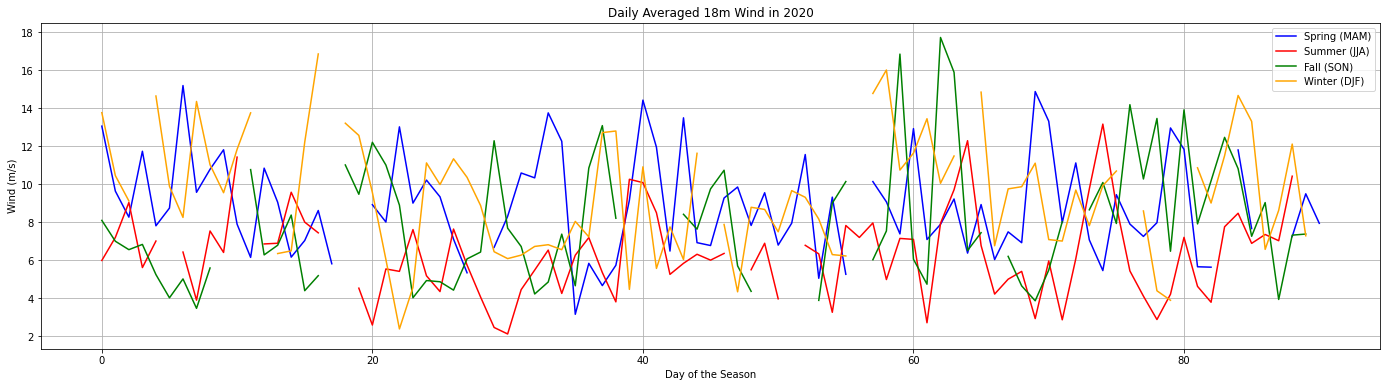

In [ ]:
days_spring=np.arange(0,91)
days_summer=np.arange(0,89)
days_fall=np.arange(0,90)
days_winter=np.arange(0,90)

#Plot each of the four seasons as a timeseries on the same plot. 
##Use different colors and add a legend to make it beautiful!

#Create the figure
fig=plt.figure(figsize=(24,6))
#add one subplot to figure
ax= fig.add_subplot(1, 1, 1)

#name and plot time on the x axis, wind on the y
wind_spring=daily_wind_spring_2020[:,1].astype('float64')
wind_summer=daily_wind_summer_2020[:,1].astype('float64')
wind_fall=daily_wind_fall_2020[:,1].astype('float64')
wind_winter=daily_wind_winter_2020[:,1].astype('float64')

#plot each season. Make sure to include a label for the legend
plt.plot(days_spring, wind_spring,color='blue', label='Spring (MAM)')
plt.plot(days_summer, wind_summer,color='red', label='Summer (JJA)')
plt.plot(days_fall, wind_fall,color='green', label='Fall (SON)')
plt.plot(days_winter, wind_winter,color='orange', label='Winter (DJF)')


#add grid lines
plt.grid()

#Add title and axis labels
ax.set_title('Daily Averaged 18m Wind in 2020')
ax.set_xlabel('Day of the Season')
ax.set_ylabel('Wind (m/s)')

#Add a legend for each season
plt.legend()


plt.show()

<h1><font color='red'> 2. 

In [ ]:
#Many ways to do this, ask Becca if you have questions!

<h1><font color='blue'> 3. 

#Write a few sentences of observations you see based on your seasonal winds.

Winter tends to have higher 18m wind than summer. The maximum winds were in Fall. The minimum winds were in summer. 

<h1><font color='red'> 4. 